# The Data

**Filename:** daily_aqi_by_county_2018.csv

#### Column Headers

 - State Name
 - County Name
 - State Code
 - County Code
 - Date: Reporting Date MM/DD/YYYY
 - AQI
 - Category
 - Defining param
 - Defining Site
 - Number of Sites Reporting

#### Category 

| AQI Range | Description |
| --- | --- |
| 0 to 50 | Good |
| 51 to 100 | Moderate |
| 101 to 150 | Unhealthy for Sensitive Groups |
| 151 to 200 | Unhealthy |
| 201 to 300 | Very Unhealthy |
| Over 300 | Hazardous |

 **Libraries we need!**

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import math
import scipy
from scipy.stats import ttest_ind

**import Data**

In [2]:
aqi_all = pd.read_csv('daily_aqi_by_county_2018.csv', parse_dates=["Date"])

In [3]:
aqi_all.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,32,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,34,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,15,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,19,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,25,Good,PM2.5,01-003-0010,1


In [5]:
df = pd.DataFrame(aqi_all) 

**1) Let's find out where is the most polluted county?**

In [24]:
print(df[df.AQI == df.AQI.max()]) 

      State Name county Name  State Code  County Code       Date  AQI  \
10770    Arizona       Pinal           4           21 2018-04-12  996   

        Category Defining Parameter Defining Site  Number of Sites Reporting  
10770  Hazardous               PM10   04-021-3008                         13  


#### we can see that Pinal in Arizona is the most polluted county

**but this is only for one data!**
**It is not right. We should use mean data for each county.**

In [25]:
df = pd.DataFrame(aqi_all) 

**The first 20 for county based on mean**

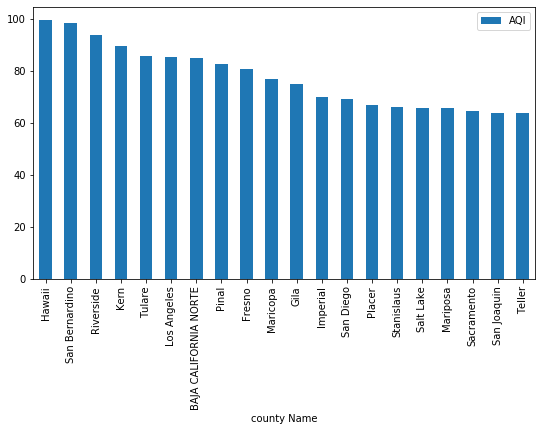

In [33]:
df[['AQI','county Name']].groupby(['county Name']).mean().sort_values('AQI',ascending=False)[:20].plot.bar(figsize=(9,5))

## We can see that the most polluted county is Hawaii based on the mean average.

**The first 20 for county based on median**

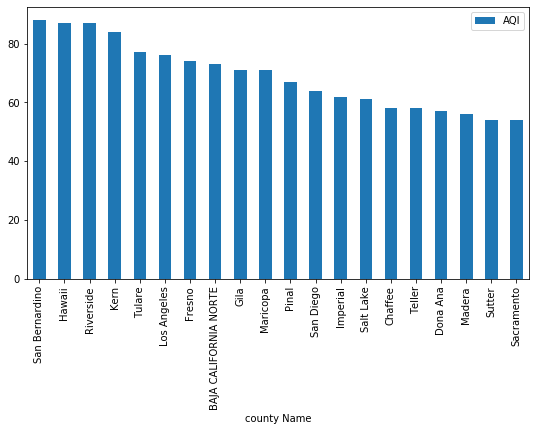

In [34]:
df[['AQI','county Name']].groupby(['county Name']).median().sort_values('AQI',ascending=False)[:20].plot.bar(figsize=(9,5))

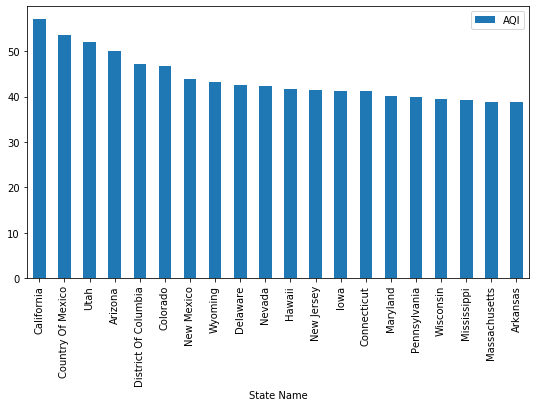

In [35]:
df[['AQI','State Name']].groupby(['State Name']).mean().sort_values('AQI',ascending=False)[:20].plot.bar(figsize=(9,5))

## Based on the mean average California is the most polluted State in USA. God help them!

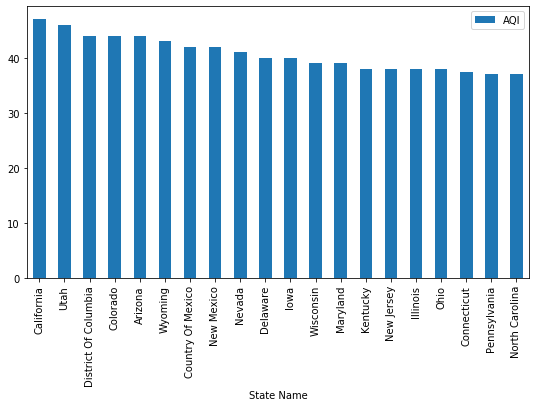

In [37]:
df[['AQI','State Name']].groupby(['State Name']).median().sort_values('AQI',ascending=False)[:20].plot.bar(figsize=(9,5))

## Also, based on the meadian average the most polluted State is California. 

### 2) Category vs AQI boxplot

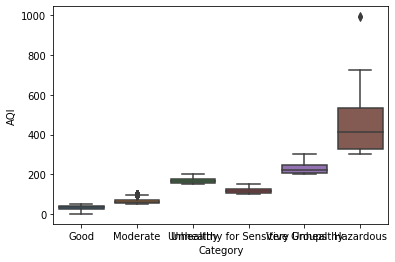

In [39]:
import pandas as pd
import seaborn as sns
sns.boxplot(x='Category', y='AQI', data=df)

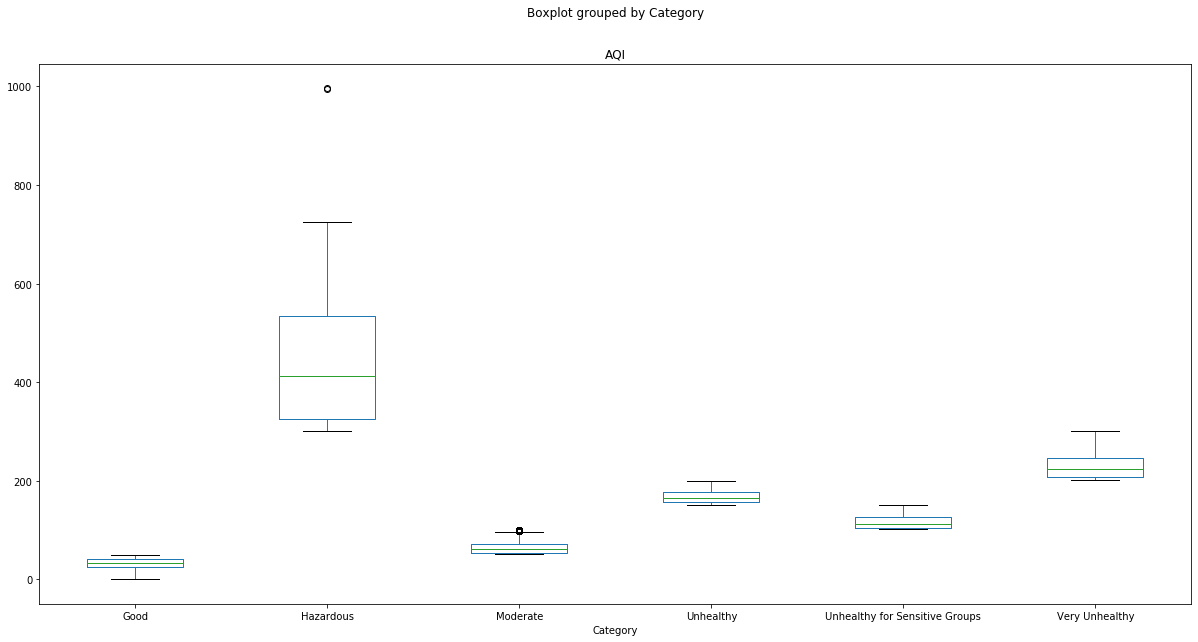

In [43]:
plt.rcParams["figure.figsize"] = [20, 10]

df.boxplot(by ='Category', column =['AQI'], grid = False) 

### 3) Air quality index time series

Text(0, 0.5, 'Average air quality index in USA')

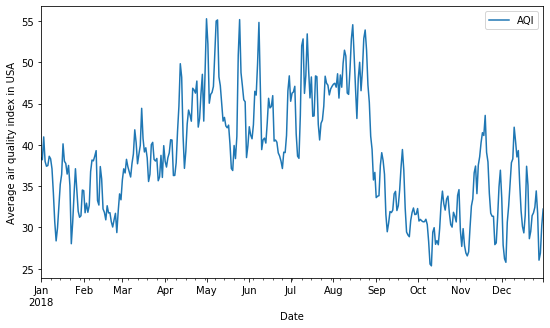

In [51]:
ax = df[['AQI','Date']].groupby(['Date']).mean().plot(figsize=(9,5))
ax.set_ylabel("Average air quality index in USA")

### 4) Most important Air pollutants in Washington

In [5]:
#try to locate only Washington state
aqi_all[aqi_all['State Name'].str.contains("Washington")]

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
311594,Washington,Adams,53,1,2018-01-01,26,Good,PM2.5,53-001-0003,1
311595,Washington,Adams,53,1,2018-01-02,20,Good,PM2.5,53-001-0003,1
311596,Washington,Adams,53,1,2018-01-03,20,Good,PM2.5,53-001-0003,1
311597,Washington,Adams,53,1,2018-01-04,32,Good,PM2.5,53-001-0003,1
311598,Washington,Adams,53,1,2018-01-05,36,Good,PM2.5,53-001-0003,1
...,...,...,...,...,...,...,...,...,...,...
322261,Washington,Yakima,53,77,2018-12-27,67,Moderate,PM2.5,53-077-0009,4
322262,Washington,Yakima,53,77,2018-12-28,64,Moderate,PM2.5,53-077-0009,4
322263,Washington,Yakima,53,77,2018-12-29,35,Good,PM2.5,53-077-0009,4
322264,Washington,Yakima,53,77,2018-12-30,13,Good,PM2.5,53-077-0009,4


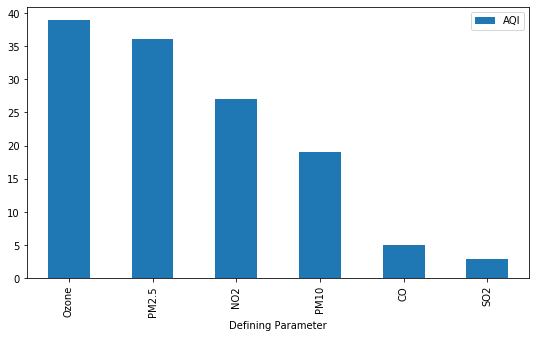

In [6]:
df[['AQI','Defining Parameter']].groupby(['Defining Parameter']).median().sort_values('AQI',ascending=False).plot.bar(figsize=(9,5))

**The six most common pollutants include ozone, PM2.5, NO2, PM10, CO and SO2**

**The most common obviously is Ozone!**

### 5) Confidence interval

In [133]:

stats = df[['AQI','county Name']].groupby(['county Name']).agg(['mean', 'count', 'std'])
print(stats)
print('-'*30)

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_high'] = ci95_hi
stats['ci95_low'] = ci95_lo

print(stats)

#new_stats = df.drop(['AQI', 'State Name' , 'State Code' , 'County Code','Category' , 'Date' , 'Defining Parameter' , 'Defining Site', 'Number of Sites Reporting'], axis=1)



                   AQI                 
                  mean count        std
county Name                            
Ada          44.082192   365  19.223779
Adair        39.627397   365  15.471289
Adams        35.377672  1684  20.660625
Adjuntas     15.333333    27   5.378018
Aiken        38.434211   228  12.596065
...                ...   ...        ...
Yavapai      45.104110   365  11.636203
Yellowstone  31.565934   364  19.044490
Yolo         49.276712   365  26.833586
York         40.402516   954  15.063470
Yuma         51.413699   365  22.170328

[815 rows x 3 columns]
------------------------------
                   AQI                   ci95_high   ci95_low
                  mean count        std                      
county Name                                                  
Ada          44.082192   365  19.223779  46.054380  42.110003
Adair        39.627397   365  15.471289  41.214614  38.040181
Adams        35.377672  1684  20.660625  36.364471  34.390874
Adjuntas     

In [134]:
stats.head()

AQI                   ci95_high   ci95_low
                  mean count        std                      
county Name                                                  
Ada          44.082192   365  19.223779  46.054380  42.110003
Adair        39.627397   365  15.471289  41.214614  38.040181
Adams        35.377672  1684  20.660625  36.364471  34.390874
Adjuntas     15.333333    27   5.378018  17.361933  13.304733
Aiken        38.434211   228  12.596065  40.069232  36.799189

In [135]:
stats = stats.drop(["AQI"], axis=1)

### So, the next table contain only county names and their 95% confidence interval.

In [136]:
stats

,ci95_high,ci95_low
,,
county Name,,
Ada,46.054380,42.110003
Adair,41.214614,38.040181
Adams,36.364471,34.390874
Adjuntas,17.361933,13.304733
Aiken,40.069232,36.799189
...,...,...
Yavapai,46.297880,43.910339
Yellowstone,33.522411,29.609457


### Problem 7) In this question we can test if the mean of AQI in winter is equel to mean in summer or not?

our hypothesis test will be:

***
H$_0$    : $\delta$ = 0
 
H$_A$: $\delta$ $\neq$ 0 

***

Which $\delta$  is the difference between the mean of AQI in winter and summer.

$\delta$  = $\mu_W$ - $\mu_S$

We take summer from July to September and winter from January to March.

In [54]:
summer_data = df[['AQI','Date']].groupby(['Date']).mean().sort_values('Date',ascending=True)[151:243]
AQI_mean_S = np.mean(summer_data)
summer_data.shape
#print(AQI_mean_S)

(92, 1)

In [55]:
winter_data = df[['AQI','Date']].groupby(['Date']).mean().sort_values('Date',ascending=True)[:90]
AQI_mean_W = np.mean(winter_data)
winter_data.shape
#print(AQI_mean_W)

(90, 1)

In [59]:
from scipy.stats import ttest_1samp


In [57]:
groupby_gender.mean()

NameError: name 'groupby_gender' is not defined

In [61]:
scipy.stats.ttest_ind(summer_data,winter_data)

Ttest_indResult(statistic=array([16.27051263]), pvalue=array([3.39330953e-37]))

In [62]:
import statsmodels.api as sm
sm.stats.ttest_ind(summer_data, winter_data)

(array([16.27051263]), array([3.39330953e-37]), 180.0)

In [63]:
from scipy.stats import ttest_ind
print("summer mean value:",AQI_mean_S)
print("winter mean value:",AQI_mean_W)
week1_std = np.std(summer_data)
week2_std = np.std(winter_data)
print("summer std value:",week1_std)
print("winter std value:",week2_std)
ttest,pval = ttest_ind(summer_data,winter_data)
print("p-value",pval)
if pval <0.05:
    
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

summer mean value: AQI    45.419558
dtype: float64
winter mean value: AQI    35.745378
dtype: float64
summer std value: AQI    4.461035
dtype: float64
winter std value: AQI    3.438639
dtype: float64
p-value [3.39330953e-37]
we reject null hypothesis


In [63]:
r = sp.stats.ttest_ind(summer_data,winter_data)
print(r)
print(r.pvalue < alpha)

Ttest_indResult(statistic=array([16.27051263]), pvalue=array([3.39330953e-37]))
[ True]


so we reject the null hypothesis, it means that the AQI is not equal in summer and winter. The air pollution in suumer and winter is different.

## Problem 8) Difference between Texas and Michigan

In [6]:
summer_data = df[['AQI','Date']].groupby(['Date']).mean().sort_values('Date',ascending=True)
AQI_mean_S = np.mean(summer_data)

In [7]:
texas = aqi_all[aqi_all['State Name'].str.contains("Texas")]
texas.drop(['county Name','State Code','Date','Category','Defining Parameter','Number of Sites Reporting','Defining Site','County Code'],axis=1)


,State Name,AQI
278806,Texas,28
278807,Texas,29
278808,Texas,33
278809,Texas,31
278810,Texas,39
...,...,...
295817,Texas,37
295818,Texas,29
295819,Texas,23
295820,Texas,29


In [42]:
texas_aqi = texas['AQI']

In [43]:
texas_aqi.describe()

count    17016.000000
mean        36.794194
std         23.598422
min          0.000000
25%         24.000000
50%         34.000000
75%         47.000000
max        204.000000
Name: AQI, dtype: float64

In [44]:
michigan = aqi_all[aqi_all['State Name'].str.contains("Michigan")]

michigan.drop(['county Name','State Code','Date','Category','Defining Parameter','Number of Sites Reporting','Defining Site','County Code'],axis=1)


,State Name,AQI
140425,Michigan,75
140426,Michigan,20
140427,Michigan,3
140428,Michigan,8
140429,Michigan,23
...,...,...
149023,Michigan,23
149024,Michigan,32
149025,Michigan,33
149026,Michigan,27


In [45]:
michigan_aqi = michigan['AQI']

In [46]:
michigan_aqi.describe()

count    8603.000000
mean       37.975590
std        19.572972
min         0.000000
25%        27.000000
50%        37.000000
75%        45.000000
max       174.000000
Name: AQI, dtype: float64

In [23]:
AQI_mean_T = np.mean(texas_aqi)
AQI_mean_M = np.mean(michigan_aqi)

In [29]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [40]:
sample_size = 8000
ger_sampled = np.random.choice(texas_aqi, sample_size)
fr_sampled = np.random.choice(michigan_aqi, sample_size)
compare_2_groups(ger_sampled, fr_sampled, 0.05, sample_size)


Statistics=-1.524, p=0.128
Same distributions (fail to reject H0)


In [47]:
texas_aqi.mean() > michigan_aqi.mean()

False

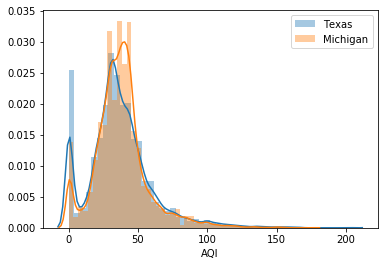

In [49]:
import seaborn as sns
sns.distplot(texas_aqi)
sns.distplot(michigan_aqi)
plt.legend(['Texas', 'Michigan'])

In [50]:
alpha = 0.05

In [52]:
import scipy as sp
r = sp.stats.ttest_ind(texas_aqi,michigan_aqi)
print(r)
print(r.pvalue < alpha)

Ttest_indResult(statistic=-3.9996548756140116, pvalue=6.361292722103862e-05)
True


so we reject the null hypothesis, it means that the AQI is not equal in Texas and Michigan. It means that air quality is better in Texas.

In [7]:
df_texas_aqi = df[df['State Name'] == 'Texas']['AQI']

In [67]:
df_michigan_aqi = df[df['State Name'] == 'Michigan']['AQI']

In [69]:
scipy.stats.ttest_ind(df_texas_aqi, df_michigan_aqi, equal_var=False)

Ttest_indResult(statistic=-4.250333636908716, pvalue=2.144031734760338e-05)

In [75]:
def independent_ttest(data1, data2, alpha=0.05):
   
    import scipy.stats as st
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = st.sem(data1), st.sem(data2)
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = st.t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - st.t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p

In [74]:
alpha = 0.05
t_stat, df, cv, p = independent_ttest(df_texas_aqi, df_michigan_aqi, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.7f' % (t_stat, df, cv, p))
print()

# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=-4.250, df=25617, cv=1.645, p=0.0000214

Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


Again..We can see that the null hypothesis should be rejected.

## Problem 9) ANOVA

first we should make a data frame for each of these states.

In [6]:
df_california_aqi = df[df['State Name'] == 'California']['AQI']

In [8]:
df_newyork_aqi = df[df['State Name'] == 'New York']['AQI']

In [9]:
df_alabama_aqi = df[df['State Name'] == 'Alabama']['AQI']

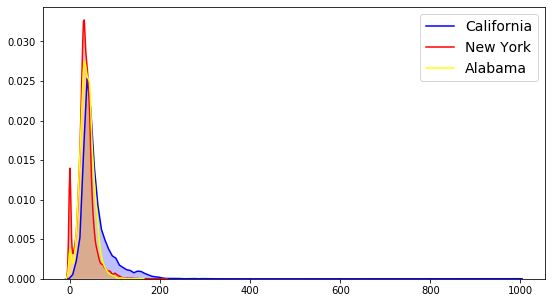

In [12]:
plt.figure(figsize=(9,5))
sns.kdeplot(df_california_aqi,shade=True,color='Blue')
sns.kdeplot(df_newyork_aqi,shade=True,color='red')
sns.kdeplot(df_alabama_aqi,shade=True,color='yellow')

plt.legend(['California','New York','Alabama'],fontsize=14)
plt.show()


In [13]:
groups = {'California':df_california_aqi,'New York':df_newyork_aqi,'Alabama':df_alabama_aqi}

In [20]:
import scipy.stats as st
def multi_anova(groups,alpha=0.05):
    """
    Two-way ANOVA between multiple groups
    groups: A dictionary object of trial groups
    """
    from itertools import combinations
    list_anova = list(combinations(list(groups.keys()),2))
    
    for comb in list_anova:
        _,p=st.f_oneway(groups[comb[0]],groups[comb[1]])
        if p>0.05:
            print("\nANOVA fails to reject the hypothesis of equal mean for {} and {}".format(comb[0],comb[1]))
            print(p)
        else:
            print("\nWe reject the hypothesis of equal mean for {} and {} as per ANOVA test result".format(comb[0],comb[1]))
            print(p)

In [21]:
multi_anova(groups)


We reject the hypothesis of equal mean for California and New York as per ANOVA test result
0.0

We reject the hypothesis of equal mean for California and Alabama as per ANOVA test result
7.412747923688049e-302

We reject the hypothesis of equal mean for New York and Alabama as per ANOVA test result
5.799037142441058e-41


In [23]:
from scipy import stats
F,p=stats.f_oneway(df_california_aqi,df_newyork_aqi,df_alabama_aqi)
print("F Value is:" ,F)
print("p Value is:" ,p)

F Value is: 2557.1704856866613
p Value is: 0.0
